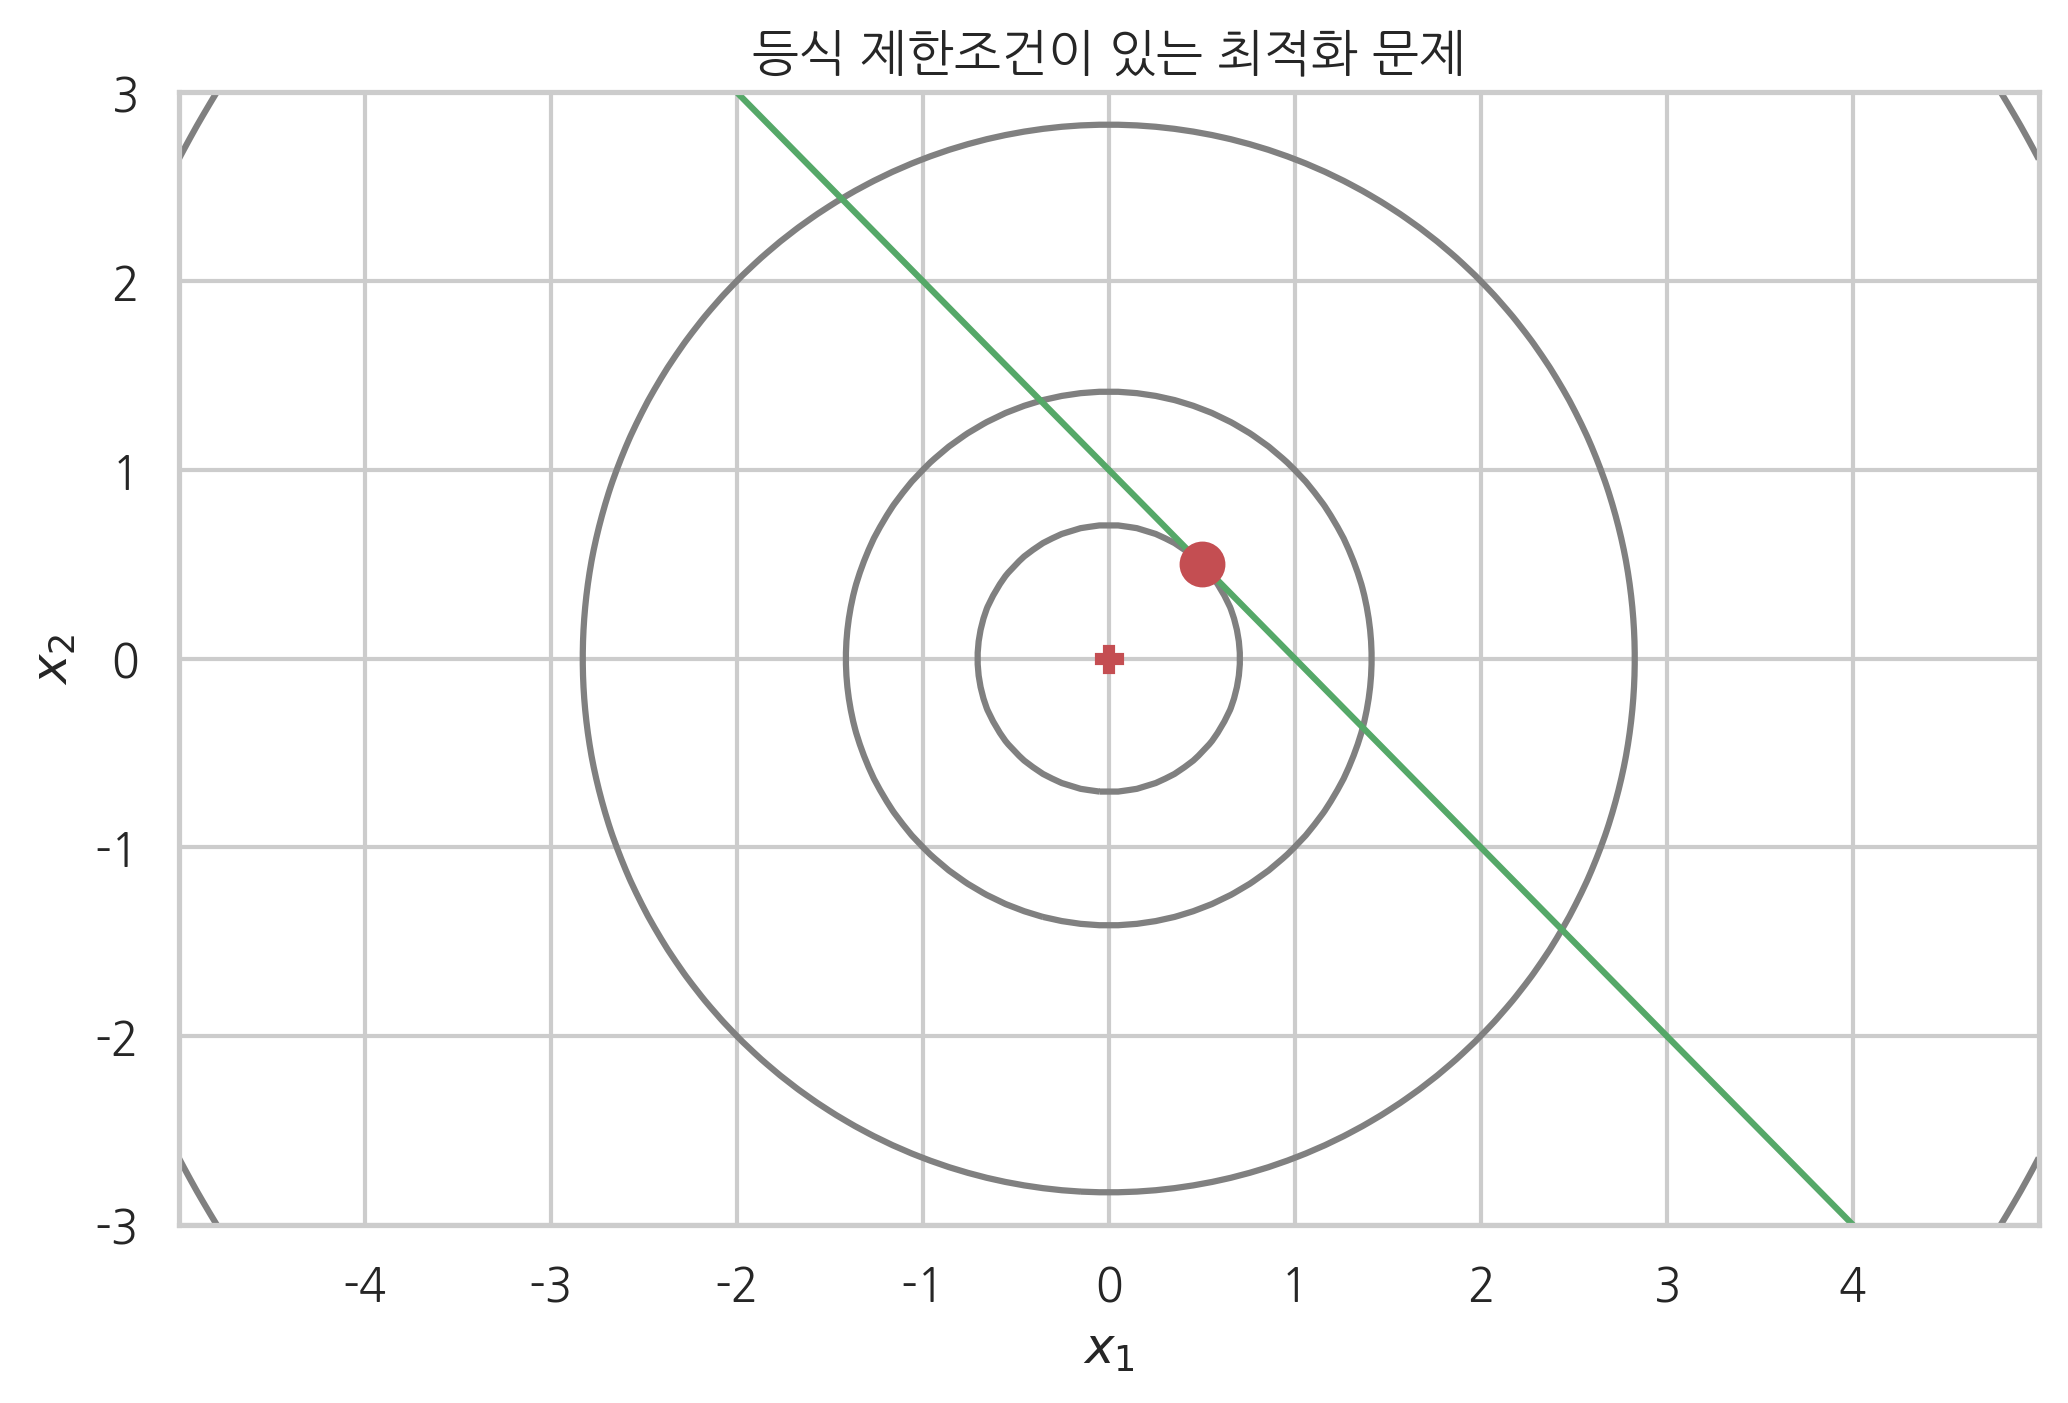

In [1]:
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("등식 제한조건이 있는 최적화 문제")
plt.show()

In [2]:
def f1array(x):
    return x[0] ** 2 + x[1] ** 2

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f1array, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

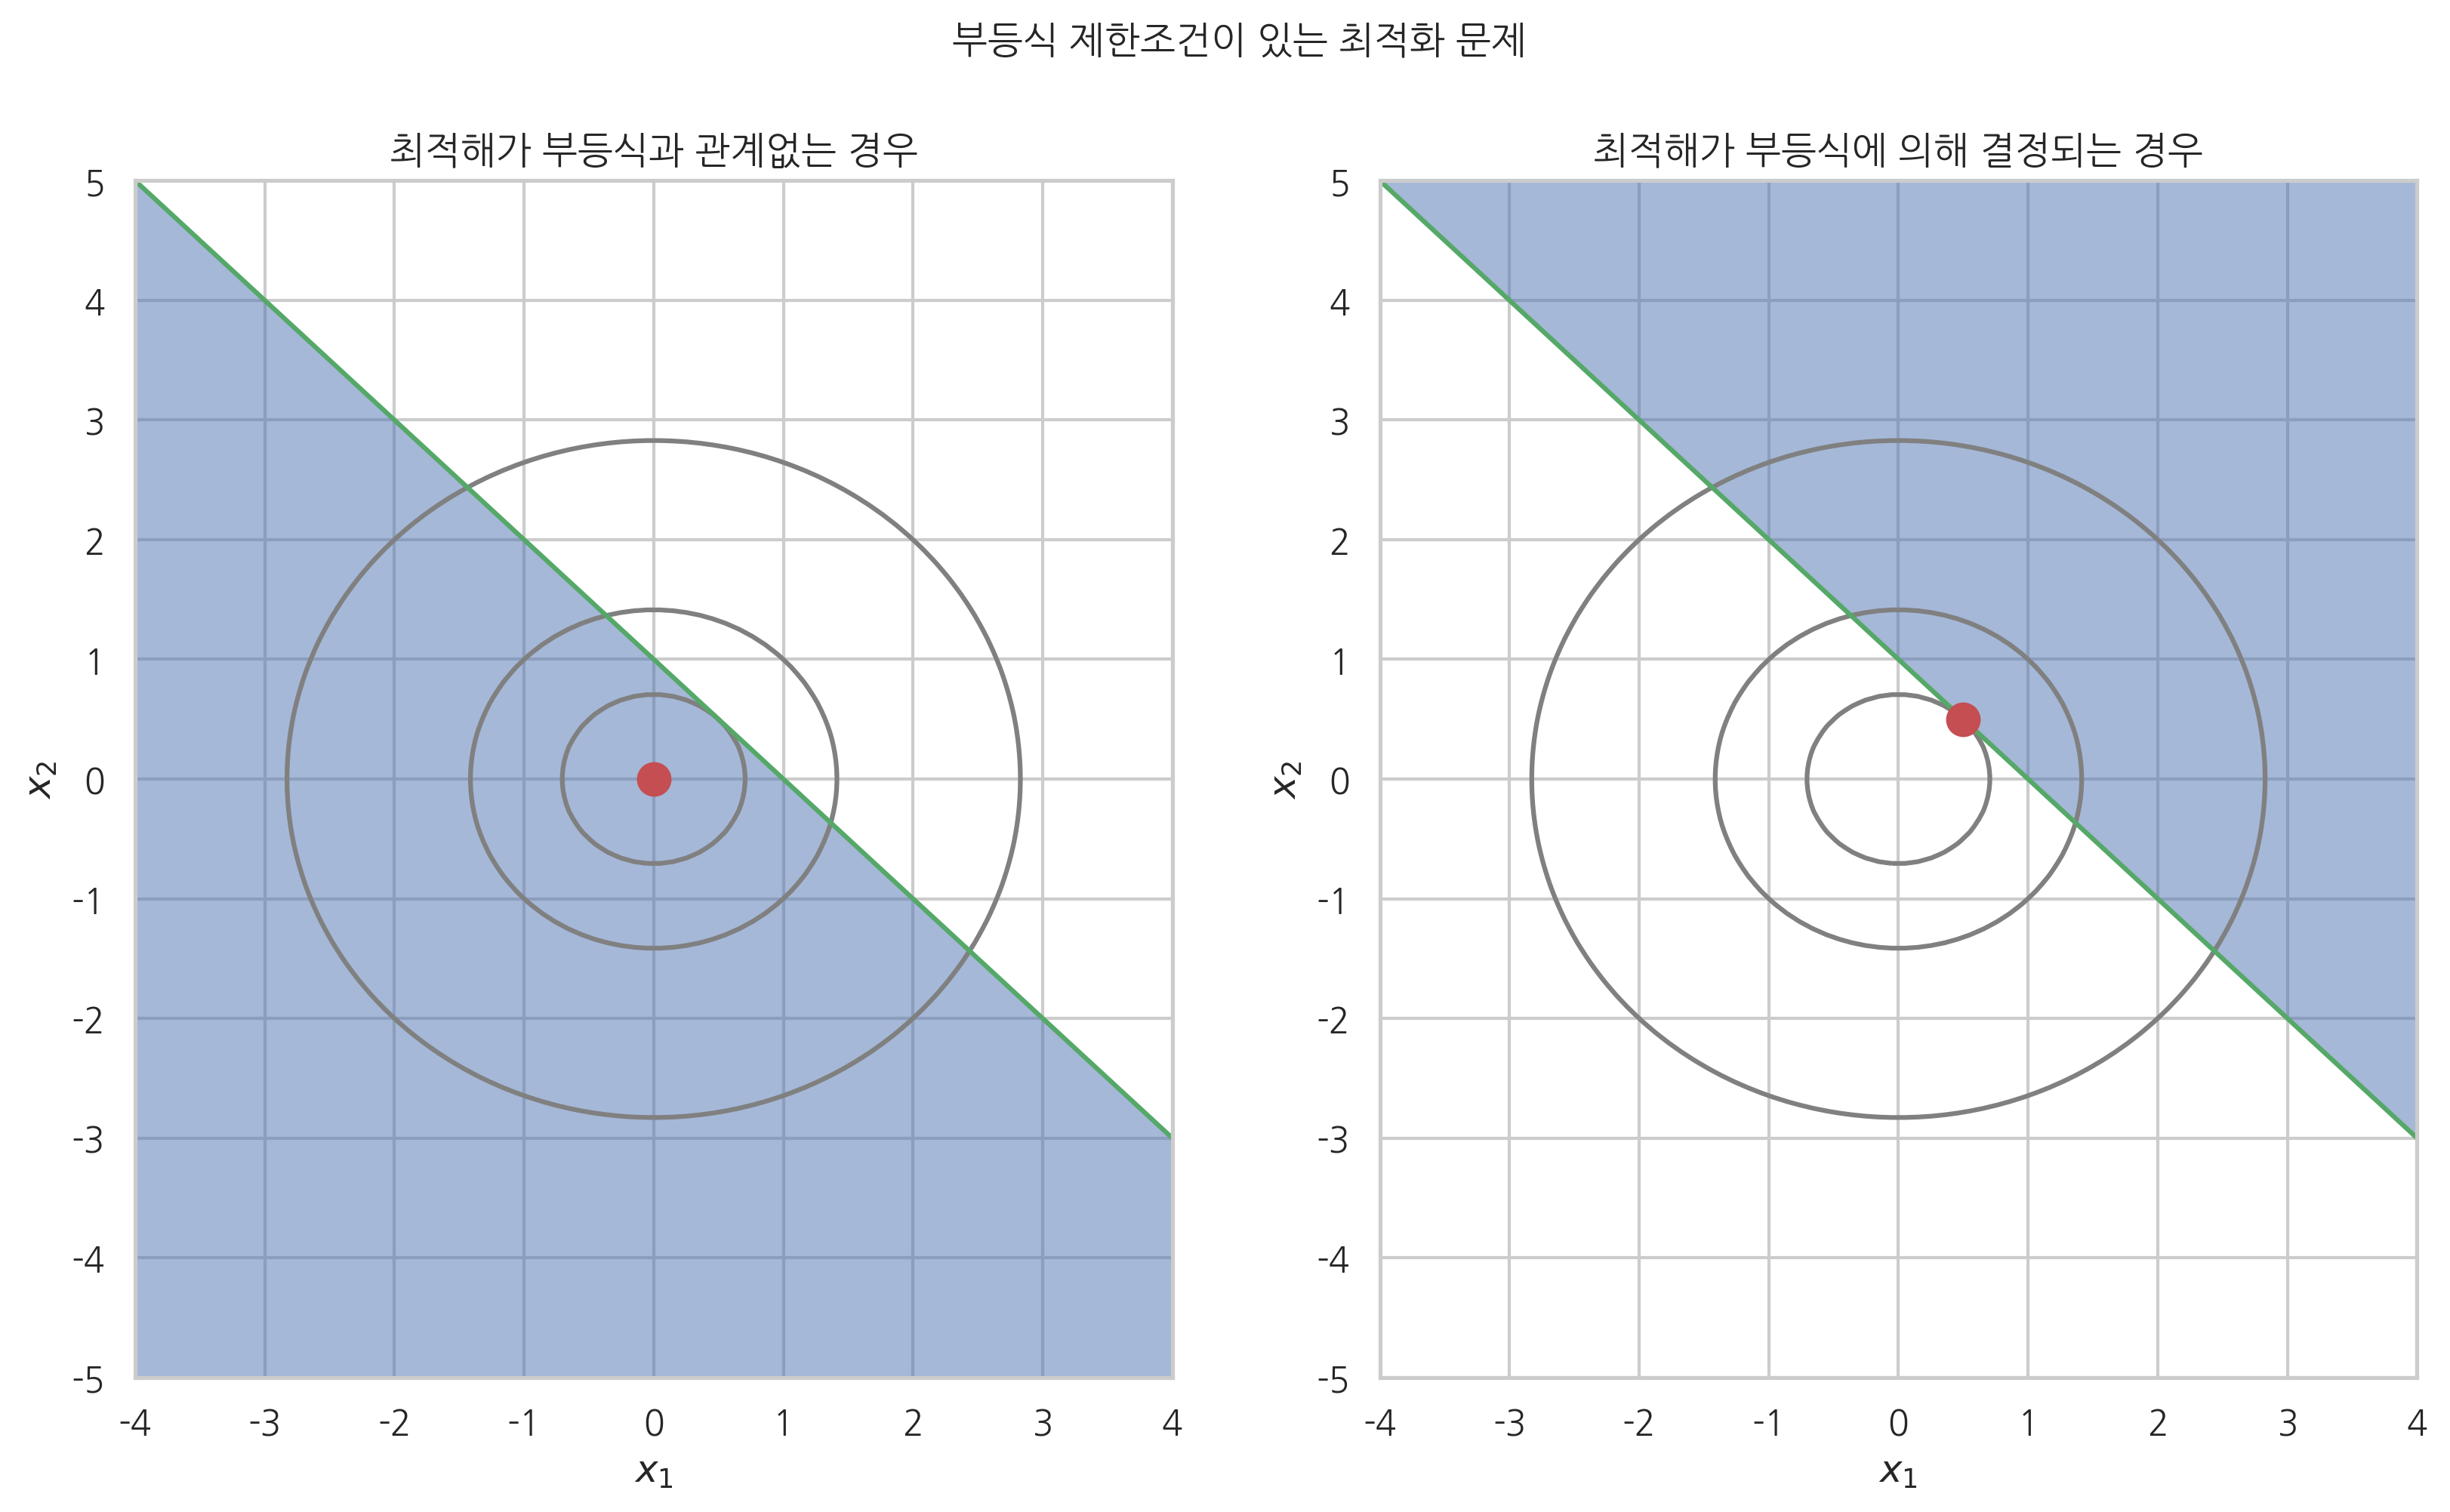

In [3]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식과 관계없는 경우")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식에 의해 결정되는 경우")
plt.suptitle("부등식 제한조건이 있는 최적화 문제")
plt.show()

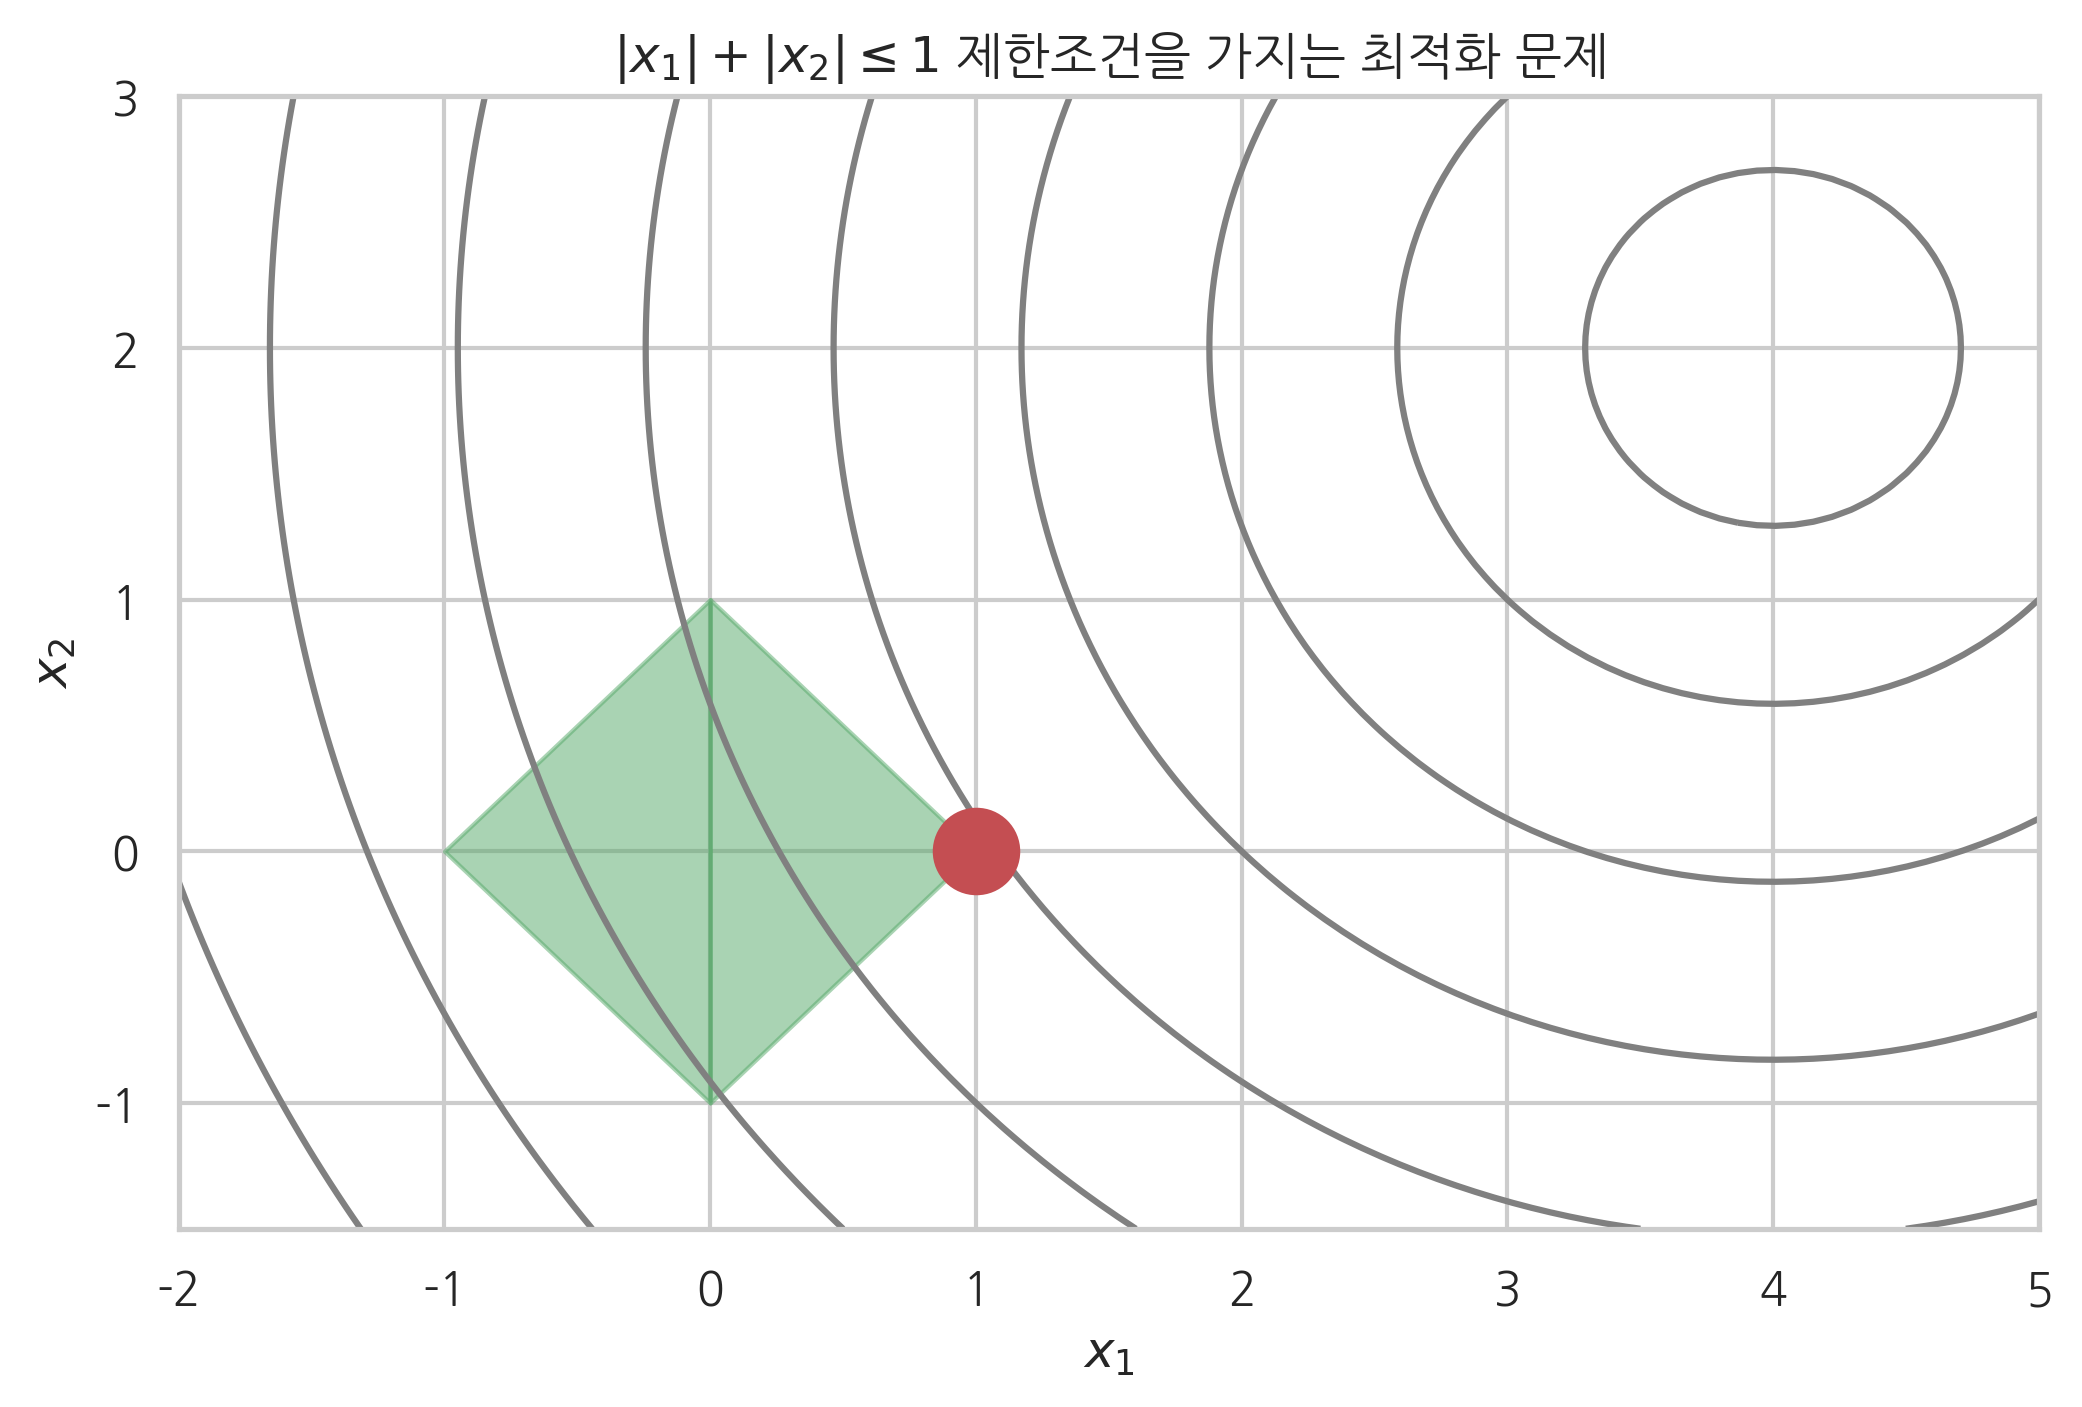

In [4]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray", levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

k = 1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.show()

In [5]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])

In [6]:
from functools import partial

def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

def ieq_constraint2(x, k):
    return np.atleast_1d(k - np.sum(np.abs(x)))

def plot_opt(k):
    x1 = np.linspace(-2, 5, 100)
    x2 = np.linspace(-1.5, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f2plt(X1, X2)
    plt.contour(X1, X2, Y, colors='gray', levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))
    
    ax = plt.gca()
    x12 = np.linspace(-k, 0, 10)
    x13 = np.linspace(0, k, 10)
    ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
    ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

    x_sol = sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[partial(ieq_constraint2, k=k)], iprint=0)
    
    plt.plot(x_sol[0], x_sol[1], 'ro', ms=20)
    plt.xlim(-2, 5)
    plt.ylim(-1.5, 3)
    plt.xticks(np.linspace(-2, 5, 8))
    plt.yticks(np.linspace(-1, 3, 5))
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
    plt.show()

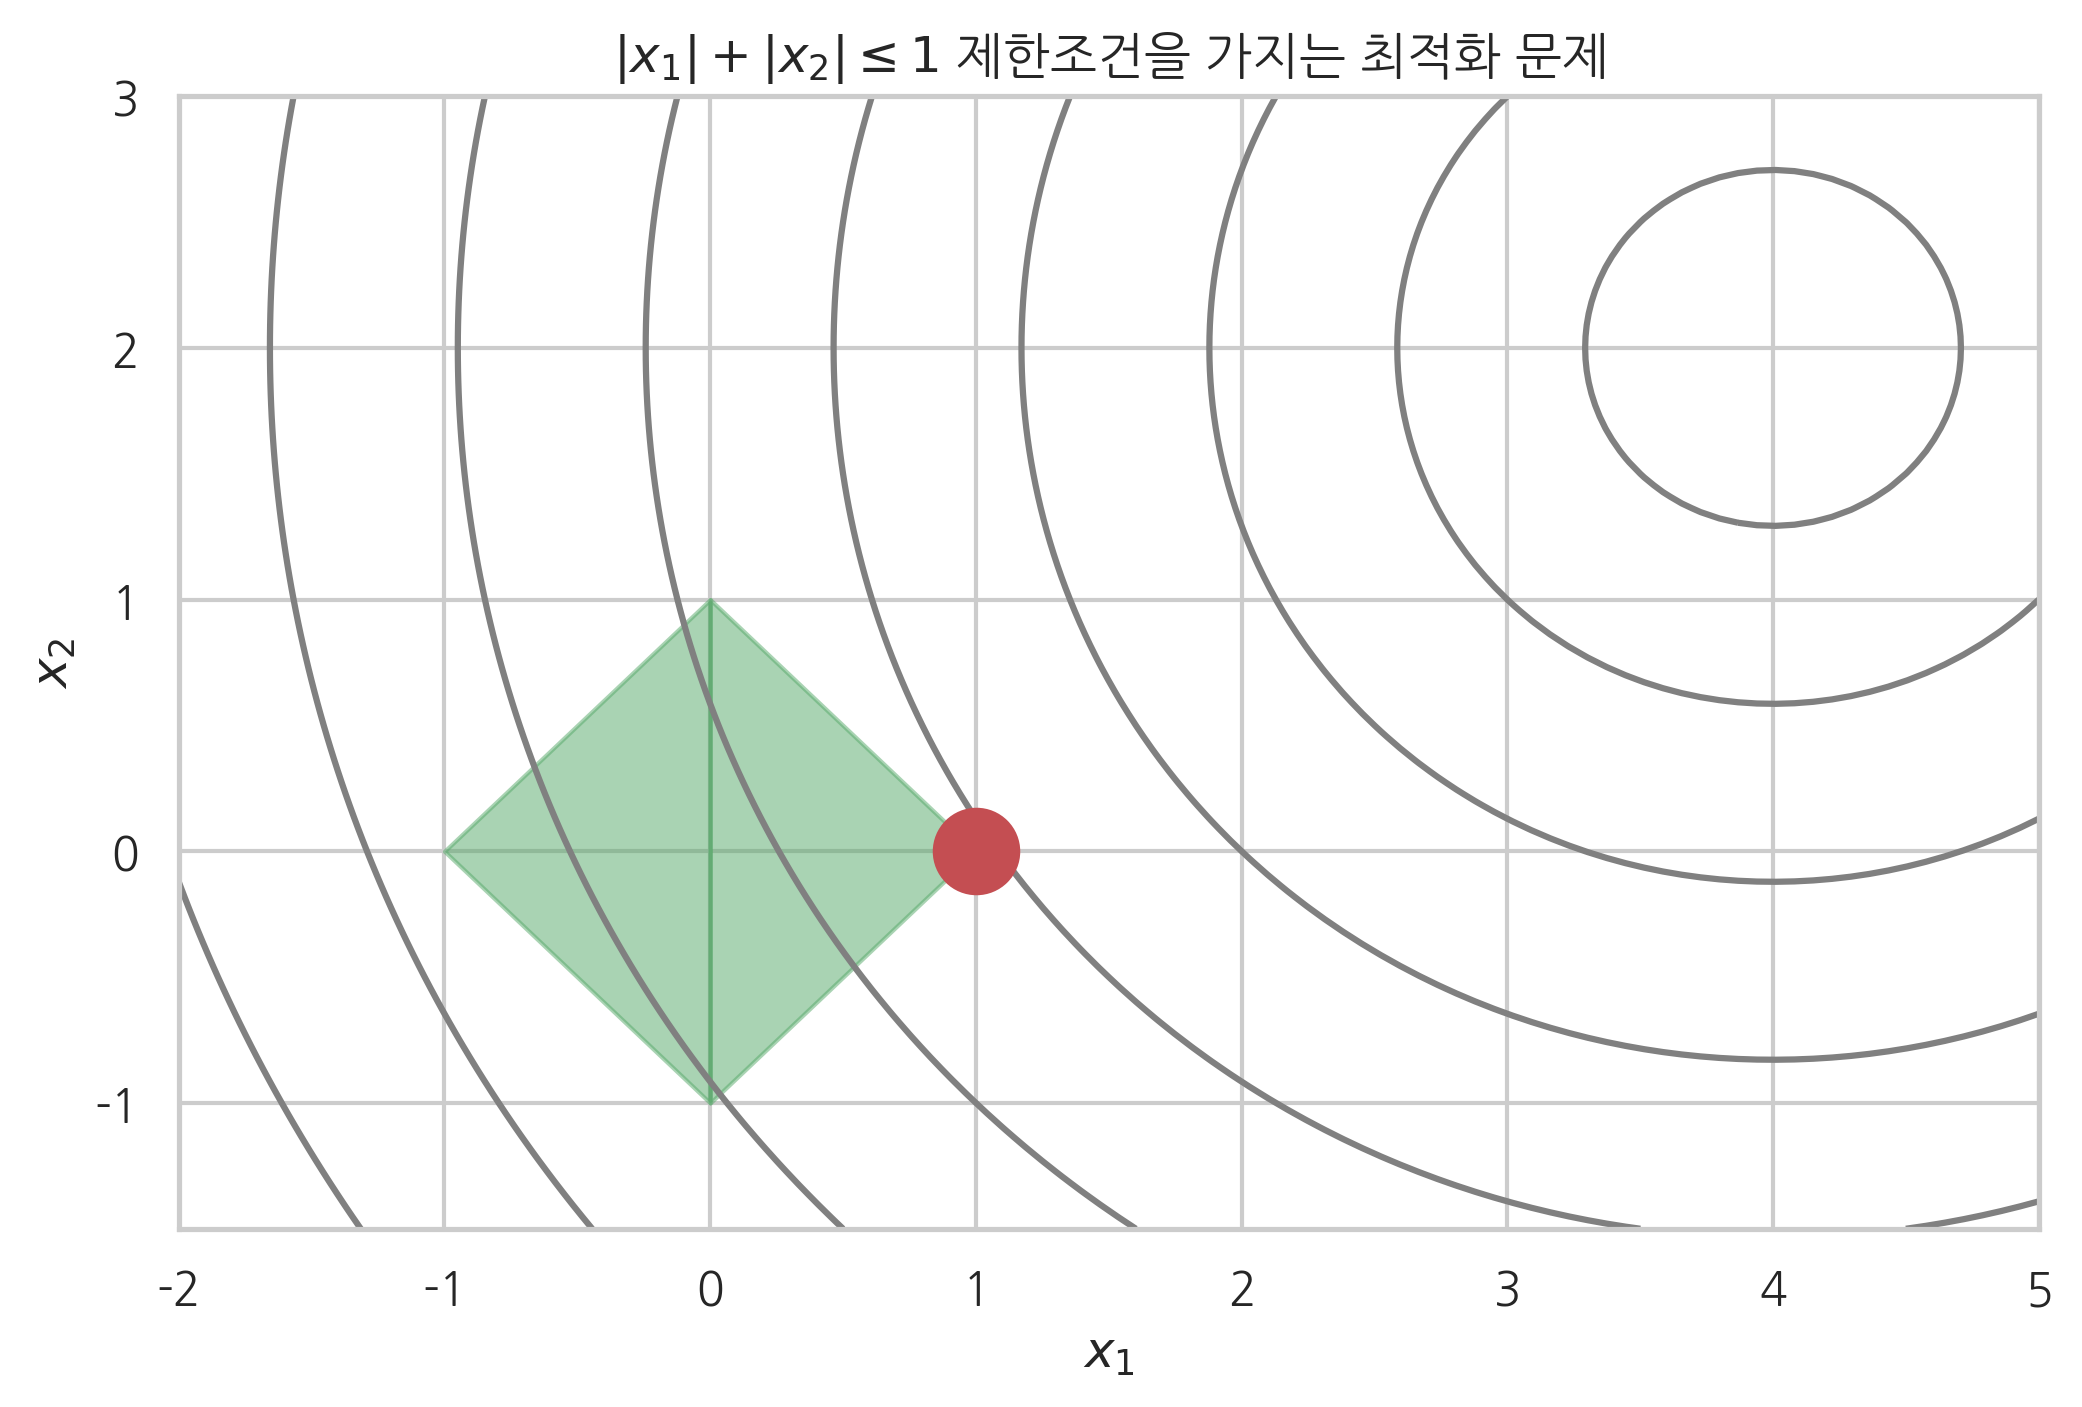

In [7]:
plot_opt(1)

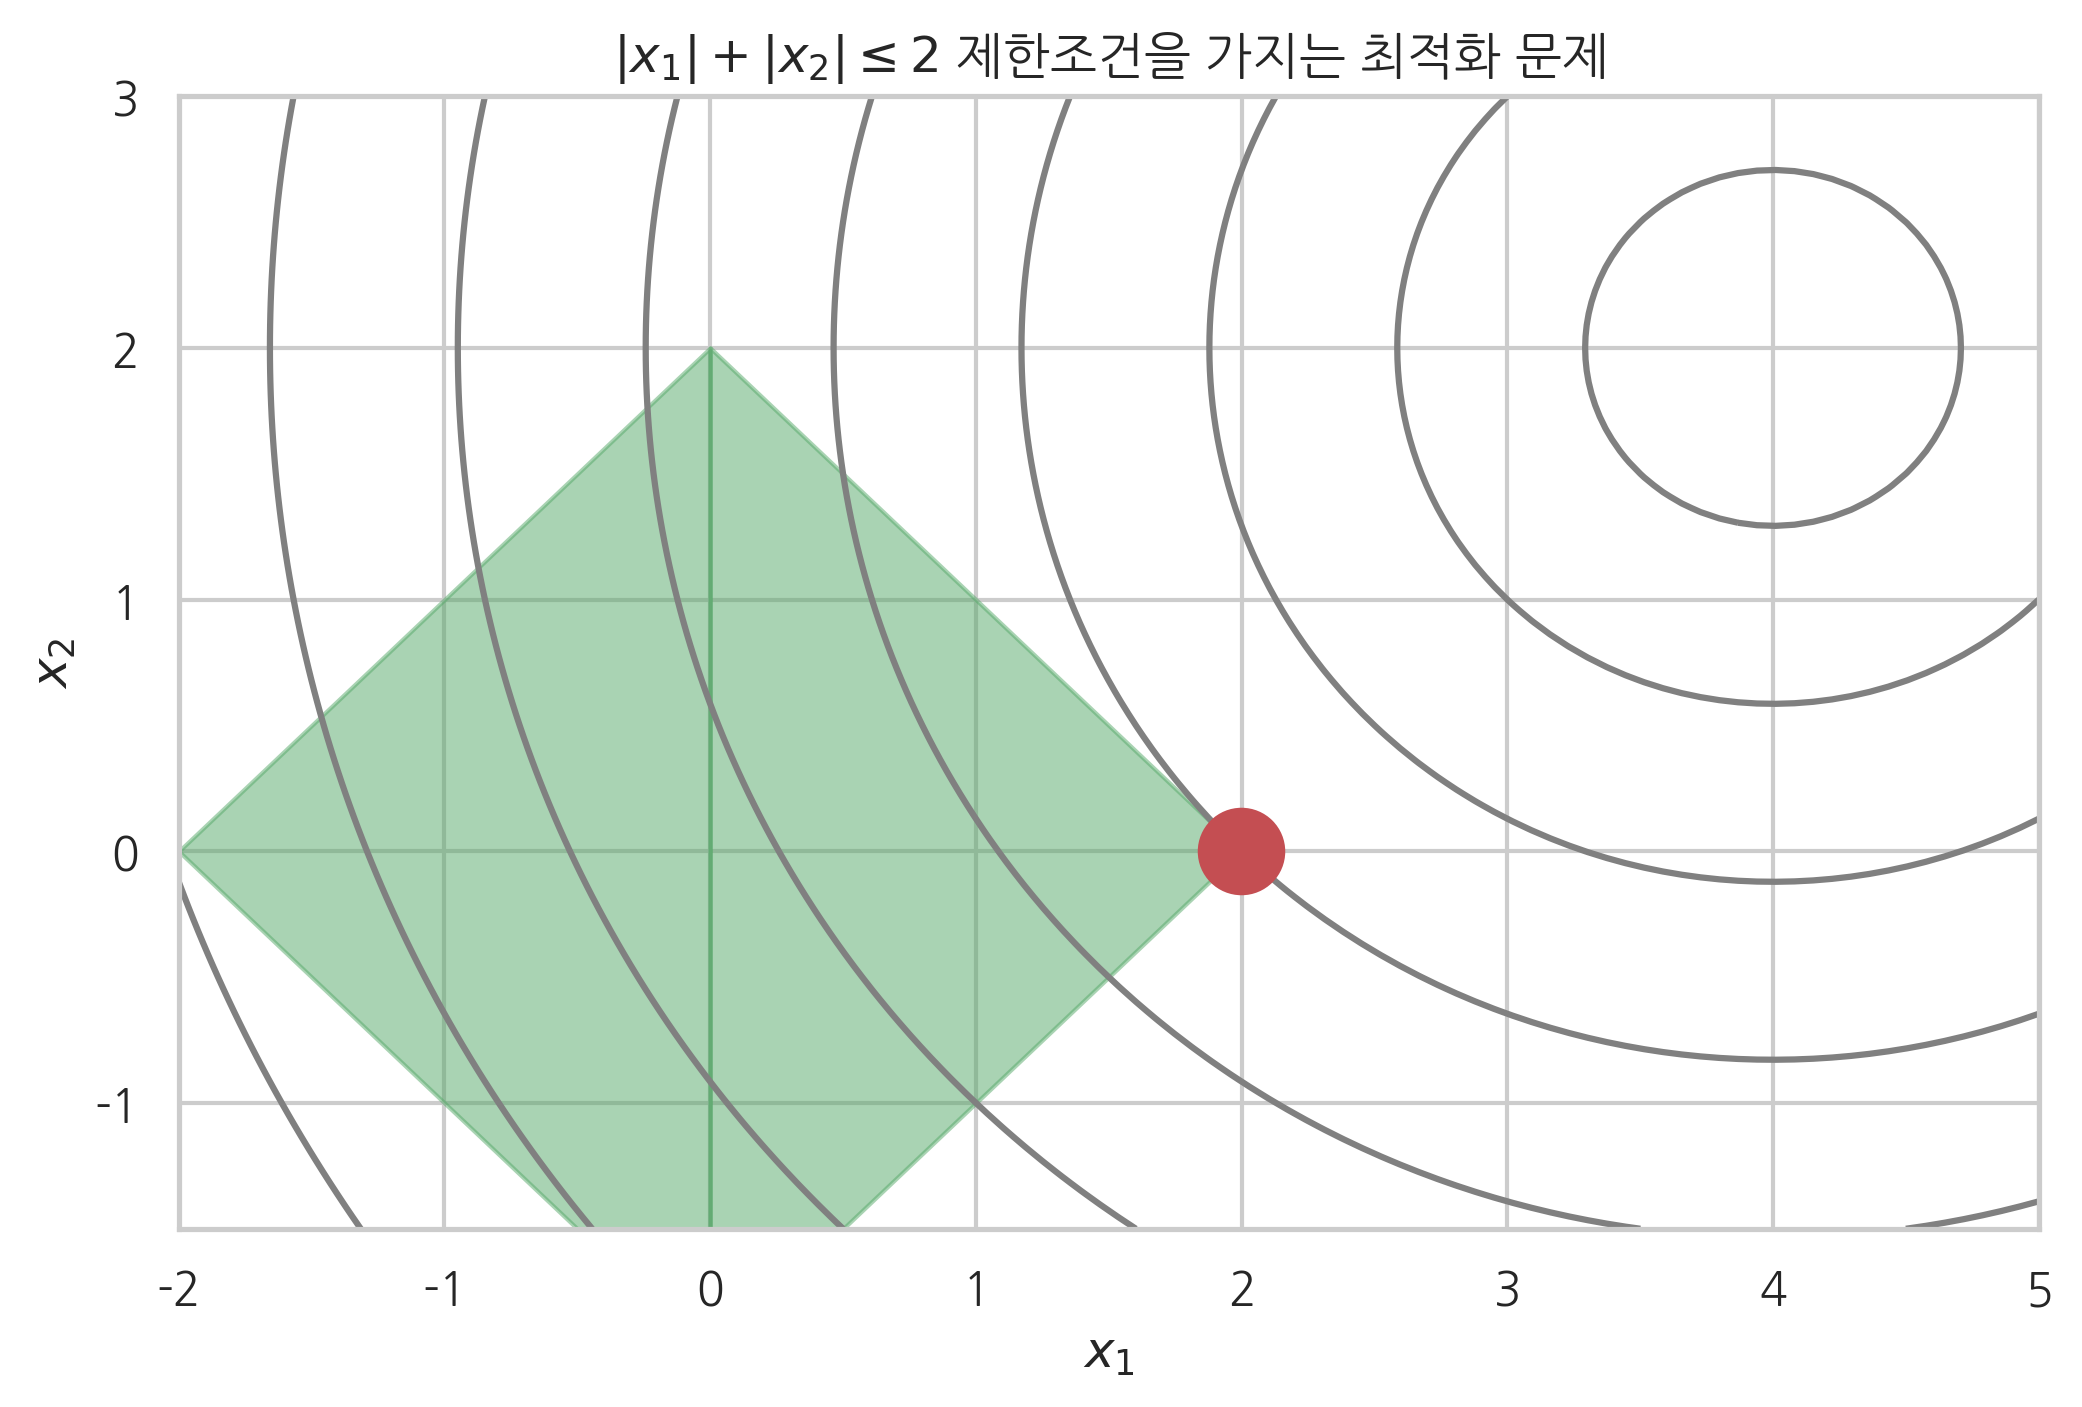

In [8]:
plot_opt(2)

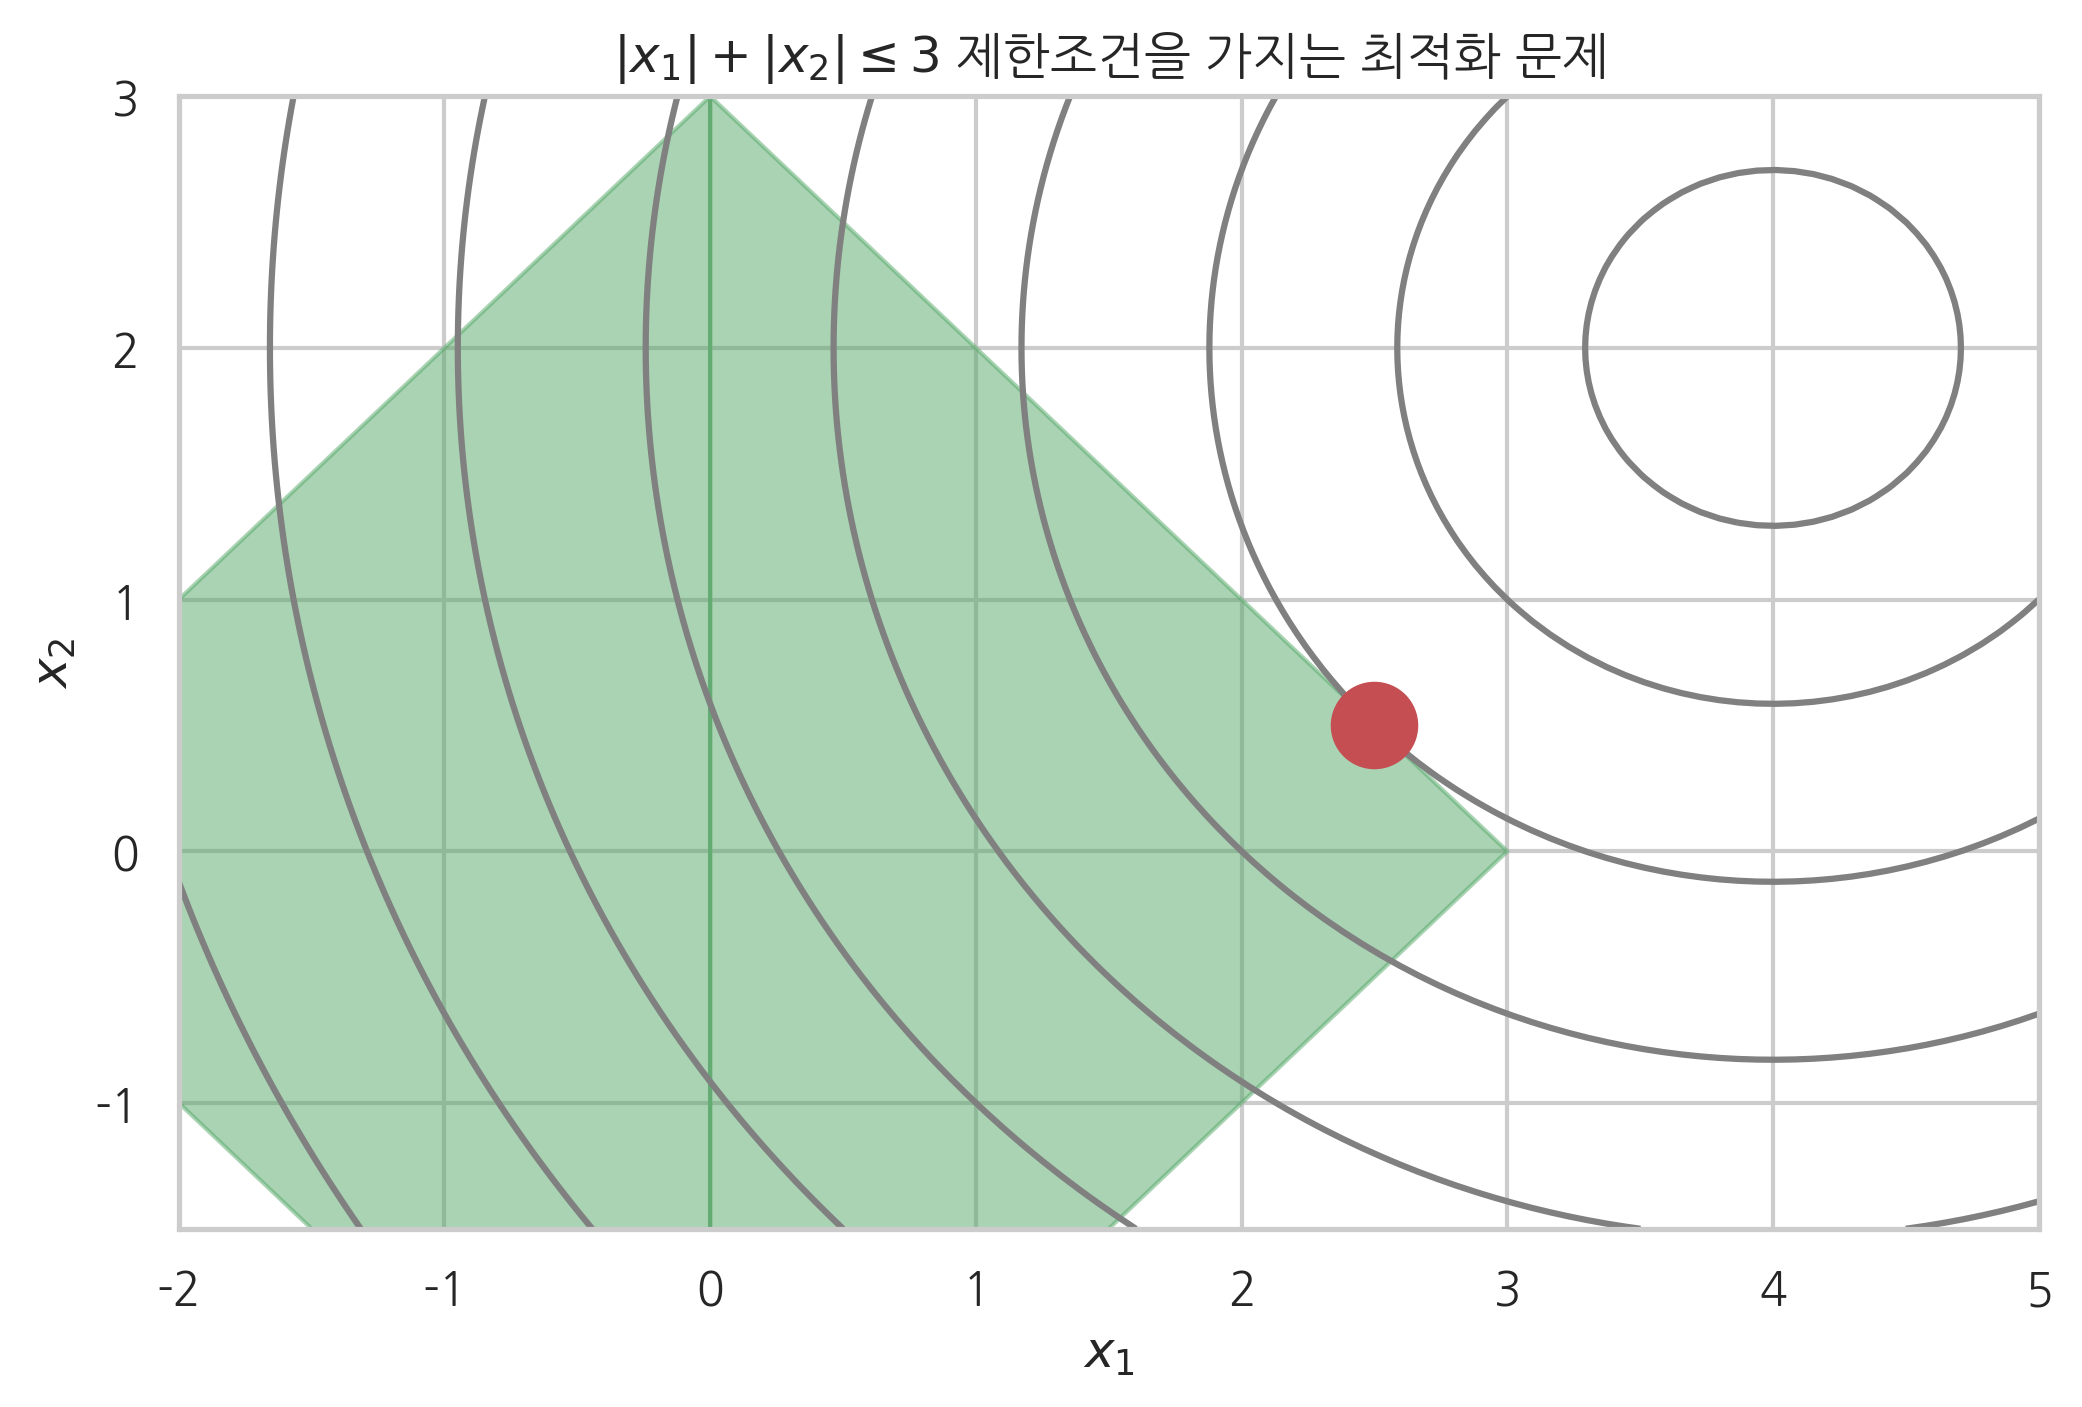

In [9]:
plot_opt(3)

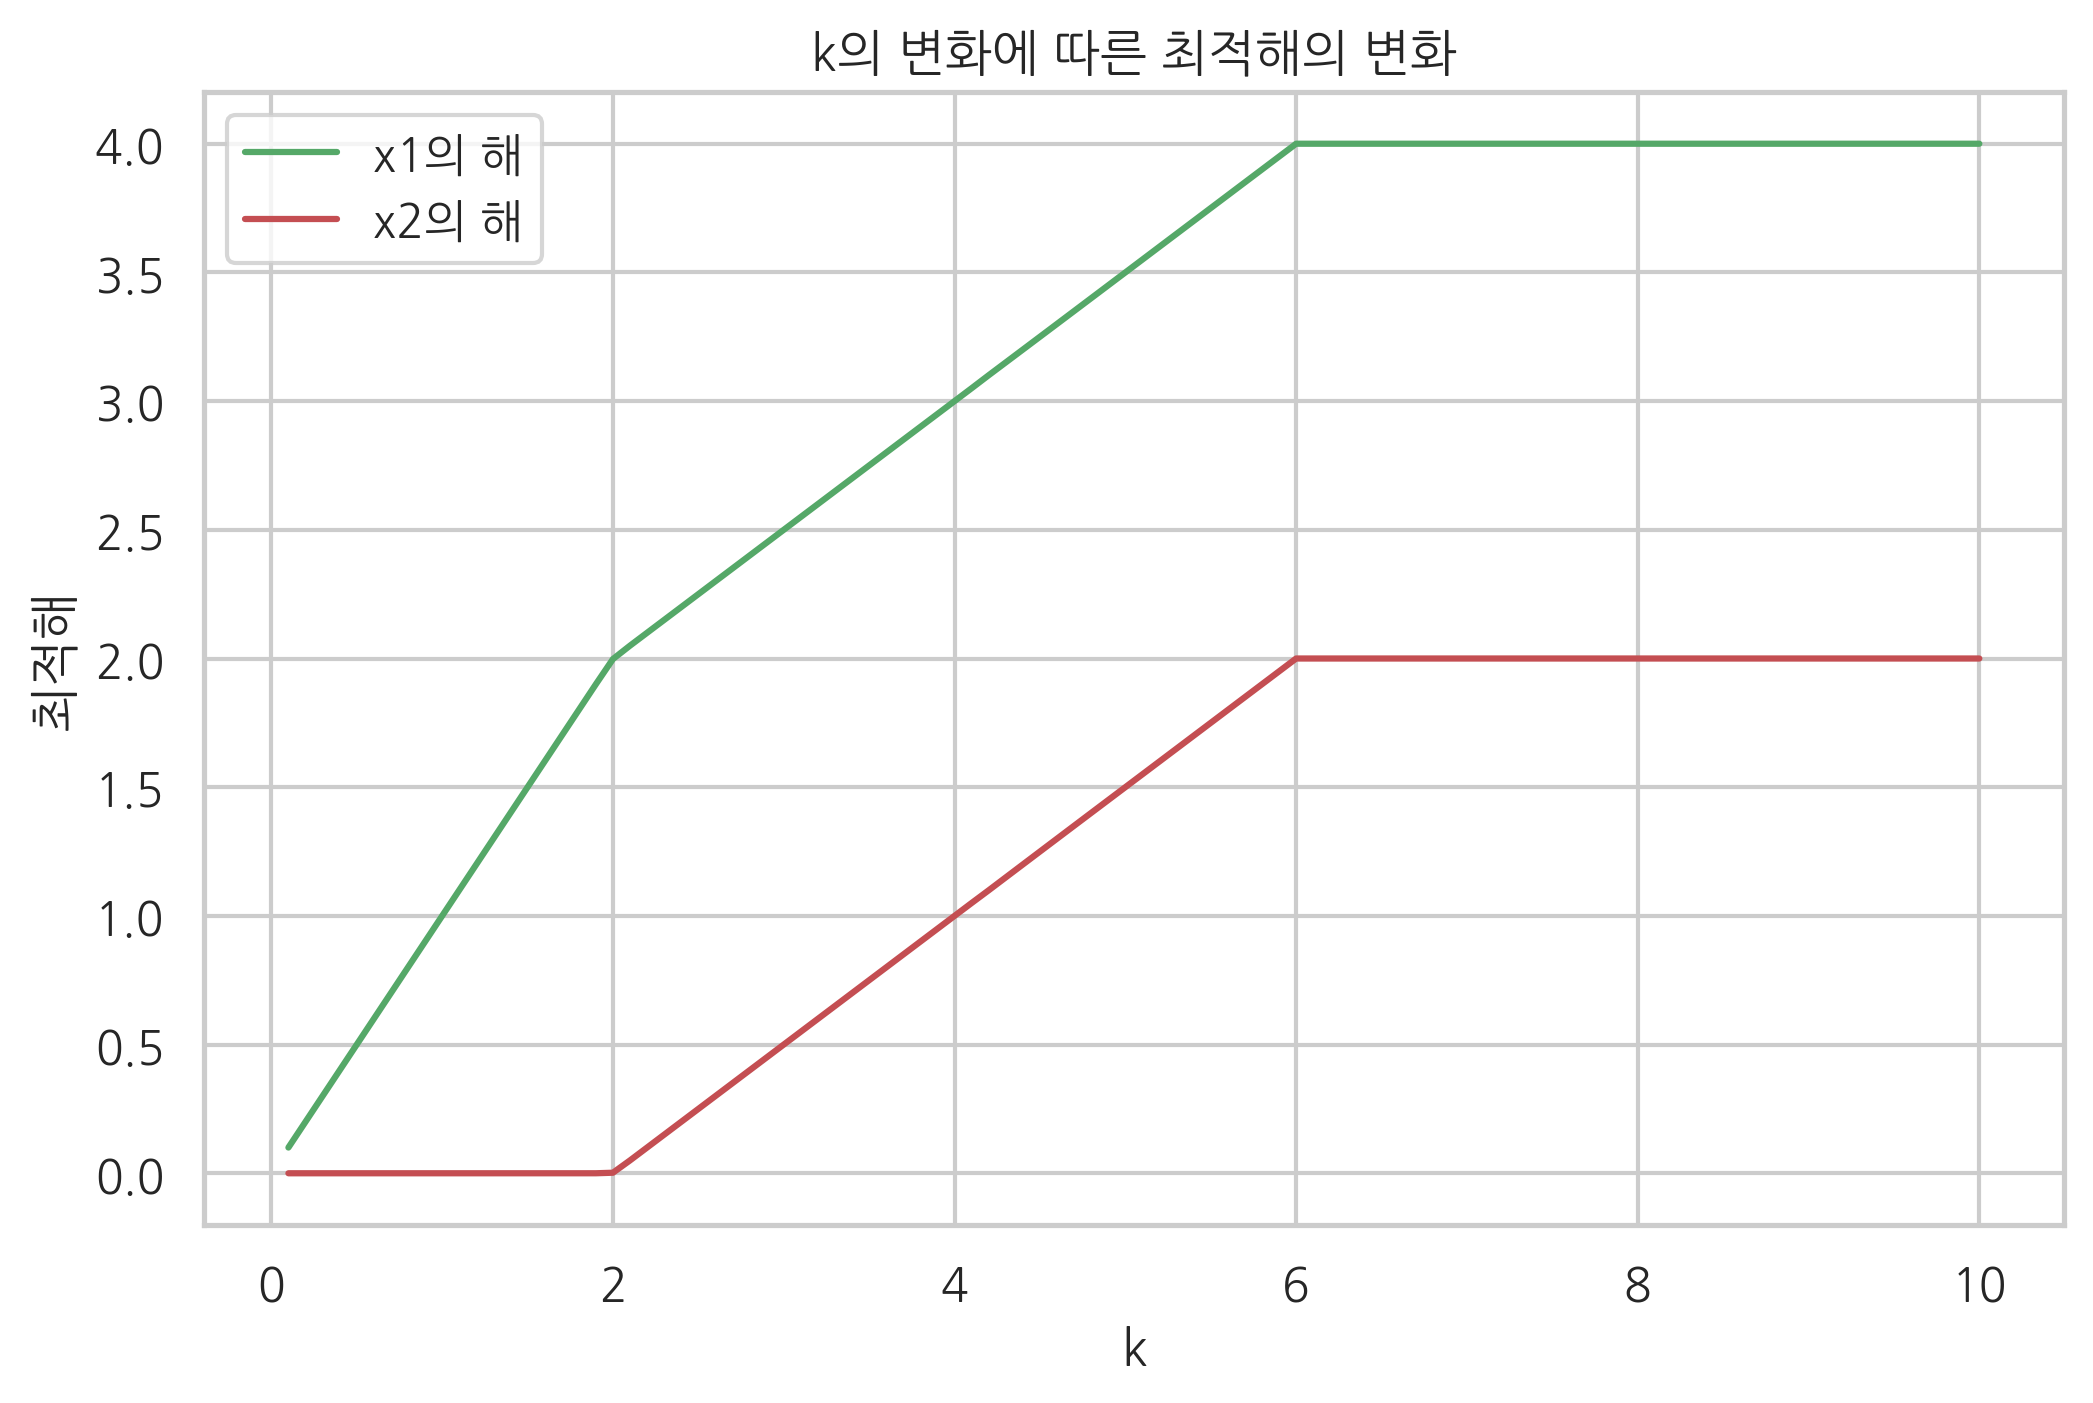

In [10]:
def ieq_constraint(k):
    return lambda x: np.atleast_1d(k - np.sum(np.abs(x)))

opt = []
k_range = np.linspace(0.1, 10, 100)
for k in k_range:
    opt += [
        sp.optimize.fmin_slsqp(
            f2, np.array([0, 0]), ieqcons=[ieq_constraint(k)], iprint=0
        )
    ]
    
plt.plot(k_range, np.array(opt)[:, 0], 'g-', label='x1의 해')
plt.plot(k_range, np.array(opt)[:, 1], 'r-', label='x2의 해')
plt.title('k의 변화에 따른 최적해의 변화')
plt.xlabel('k')
plt.ylabel('최적해')
plt.legend()
plt.show()